---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [1]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [12]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [2]:
df['Delivered'] = True
df

,Cost,Item Purchased,Name,Delivered
Store 1,22.5,Sponge,Chris,True
Store 1,2.5,Kitty Litter,Kevyn,True
Store 2,5.0,Spoon,Filip,True


In [ ]:
df['Feedback'] = ['Positive', None, 'Negative']
df

In [3]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Cost,Item Purchased,Name,Delivered,Date
0,Store 1,22.5,Sponge,Chris,True,December 1
1,Store 1,2.5,Kitty Litter,Kevyn,True,NaN
2,Store 2,5.0,Spoon,Filip,True,mid-May


In [4]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [5]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [6]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Sally,Course liasion,Engineering


In [7]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [8]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [6]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [7]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [8]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Idiomatic Pandas: Making Code Pandorable

In [9]:
import pandas as pd
df = pd.read_csv('census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [22]:
df11=(df.query('SUMLEV==50 & STNAME =="Alabama"')
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))
df11

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
        Bullock County         50       3         6      1      11   
        Butler County          50       3         6      1      13   
        Calhoun County         50       3         6      1      15   
        Chambers County        50       3         6      1      17   
        Cherokee County        50       3         6      1      19   
        Chilton County         50       3         6      1      21   
        Choctaw County         50       3         6      1      23   
        Clarke County          50       3         6      1      25   
        Clay County            50       3         6      1      27   
        Cleburne County        50       3         6      1      29   
        Coffee County          50       3         6      1      31   
        Colbert County         50       3         6      1      33   
        Conecuh County         50       3         6      1      35   
        Coosa County           50       3         6      1      37   
        Covington County       50       3         6      1      39   
        Crenshaw County        50       3         6      1      41   
        Cullman County         50       3         6      1      43   
        Dale County            50       3         6      1      45   
        Dallas County          50       3         6      1      47   
        DeKalb County          50       3         6      1      49   
        Elmore County          50       3         6      1      51   
        Escambia County        50       3         6      1      53   
        Etowah County          50       3         6      1      55   
        Fayette County         50       3         6      1      57   
        Franklin County        50       3         6      1      59   
...                           ...     ...       ...    ...     ...   
        Lamar County           50       3         6      1      75   
        Lauderdale County      50       3         6      1      77   
        Lawrence County        50       3         6      1      79   
        Lee County             50       3         6      1      81   
        Limestone County       50       3         6      1      83   
        Lowndes County         50       3         6      1      85   
        Macon County           50       3         6      1      87   
        Madison County         50       3         6      1      89   
        Marengo County         50       3         6      1      91   
        Marion County          50       3         6      1      93   
        Marshall County        50       3         6      1      95   
        Mobile County          50       3         6      1      97   
        Monroe County          50       3         6      1      99   
        Montgomery County      50       3         6      1     101   
        Morgan County          50       3         6      1     103   
        Perry County           50       3         6      1     105   
        Pickens County         50       3         6      1     107   
        Pike County            50       3         6      1     109   
        Randolph County        50       3         6      1     111   
        Russell County         50       3         6      1     113   
        St. Clair County       50       3         6      1     115   
        Shelby County          50       3         6      1     117   
        Sumter County          50       3         6      1     119   
        Talladega County       50       3         6      1     121   
        Tallapoosa County      50    

In [ ]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

In [ ]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [ ]:
df.apply(min_max, axis=1)

In [ ]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

In [ ]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

# Group by

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


In [4]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in 

Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
C

Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state 

Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in 

Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
C

Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state 

Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in 

Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564


Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Countie

Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri h

Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Countie

Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state 

Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have a

Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties

Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counti

Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Ke

Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Count

Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Count

Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state 

Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in stat

Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
C

Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Cou

Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebras

Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.379310

Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in

Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi ha

Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 668

Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in sta

Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri h

Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 668

In [5]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 668

Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine 

Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in stat

Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Countie

Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counti

Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in stat

Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Count

Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Countie

Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties i

Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in

Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state 

Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebras

Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in sta

Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in stat

Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada

Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in

Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Mont

Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebras

Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in s

In [6]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [7]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [8]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [9]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [10]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.SeriesGroupBy'>


In [17]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'size':np.size,'avg': np.average, 'sum': np.sum, 'std':np.std}))

,size,avg,sum,std
STNAME,,,,
Alabama,67,71339.343284,4779736,1.037267e+05
Alaska,29,24490.724138,710231,5.688078e+04
Arizona,15,426134.466667,6392017,9.684505e+05
Arkansas,75,38878.906667,2915918,5.665489e+04
California,58,642309.586207,37253956,1.416933e+06
Colorado,64,78581.187500,5029196,1.570276e+05
Connecticut,8,446762.125000,3574097,3.708867e+05
Delaware,3,299311.333333,897934,2.078563e+05
District of Columbia,1,601723.000000,601723,NaN


In [12]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

In [14]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2010': np.sum}))

,POPESTIMATE2010
STNAME,
Alabama,4785161
Alaska,714021
Arizona,6408208
Arkansas,2922394
California,37334079
Colorado,5048254
Connecticut,3579717
Delaware,899791
District of Columbia,605126


# Scales

In [ ]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

In [ ]:
df['Grades'].astype('category').head()

In [ ]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

In [ ]:
grades > 'C'

In [ ]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

# Pivot Tables

In [ ]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [ ]:
df.head()

In [1]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

NameError: name 'df' is not defined

In [ ]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

# Date Functionality in Pandas

In [2]:
import pandas as pd
import numpy as np

### Timestamp

In [3]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [4]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [5]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [6]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [7]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

### PeriodIndex

In [8]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [9]:
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime

In [10]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,16,46
"Aug 29, 2014",14,66
2015-06-26,59,99
7/12/16,27,17


In [11]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,16,46
2014-08-29,14,66
2015-06-26,59,99
2016-07-12,27,17


In [12]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [13]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [14]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [15]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [16]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,104,125
2016-10-16,109,122
2016-10-30,111,127
2016-11-13,117,126
2016-11-27,114,126
2016-12-11,109,121
2016-12-25,105,126
2017-01-08,105,125
2017-01-22,101,123


In [17]:
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [18]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,5.0,-3.0
2016-10-30,2.0,5.0
2016-11-13,6.0,-1.0
2016-11-27,-3.0,0.0
2016-12-11,-5.0,-5.0
2016-12-25,-4.0,5.0
2017-01-08,0.0,-1.0
2017-01-22,-4.0,-2.0


In [19]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,108.0,124.666667
2016-11-30,115.5,126.000000
2016-12-31,107.0,123.500000
2017-01-31,103.0,124.000000


In [20]:
df['2017']

,Count 1,Count 2
2017-01-08,105,125
2017-01-22,101,123


In [21]:
df['2016-12']

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126


In [22]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126
2017-01-08,105,125
2017-01-22,101,123


In [ ]:
df.asfreq('W', method='ffill')

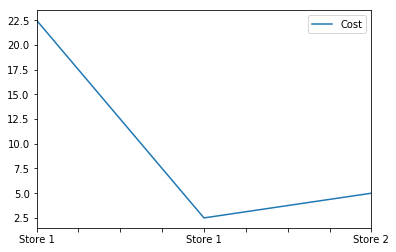

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()